In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from dateutil.relativedelta import relativedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

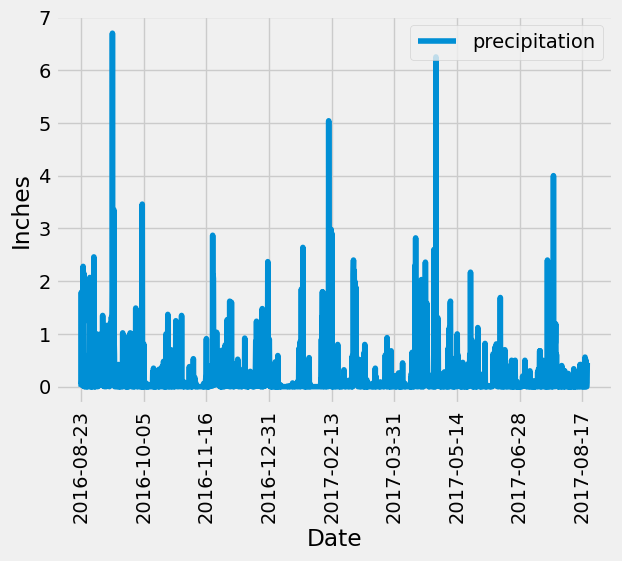

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
year_ago = recent_date - relativedelta(years=1)

# Perform a query to retrieve the date and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_data, columns=['date','precipitation'])

# Sort the dataframe by date
df.sort_values(by='date', inplace=True)
df.set_index('date', inplace=True)
df.dropna(inplace=True)
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
print(f'There are {session.query(station).count()} stations in the dataset.')

There are 9 stations in the dataset.


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    all()
most_active_stations
# Display the result
for station, measurement_count in most_active_stations:
    print(f"Station: {station}, Measurement Count: {measurement_count}")

Station: USC00519281, Measurement Count: 2772
Station: USC00519397, Measurement Count: 2724
Station: USC00513117, Measurement Count: 2709
Station: USC00519523, Measurement Count: 2669
Station: USC00516128, Measurement Count: 2612
Station: USC00514830, Measurement Count: 2202
Station: USC00511918, Measurement Count: 1979
Station: USC00517948, Measurement Count: 1372
Station: USC00518838, Measurement Count: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_id).all()

print(f'There lowest temperature for the most active station is: {session.query(func.min(measurement.tobs)).filter(measurement.station == station_id).all()[0][0]}')
print(f'There highest temperature for the most active station is: {session.query(func.max(measurement.tobs)).filter(measurement.station == station_id).all()[0][0]}')
print(f'There average temperature for the most active station is: {session.query(func.avg(measurement.tobs)).filter(measurement.station == station_id).all()[0][0]}')

There lowest temperature for the most active station is: 54.0
There highest temperature for the most active station is: 85.0
There average temperature for the most active station is: 71.66378066378067


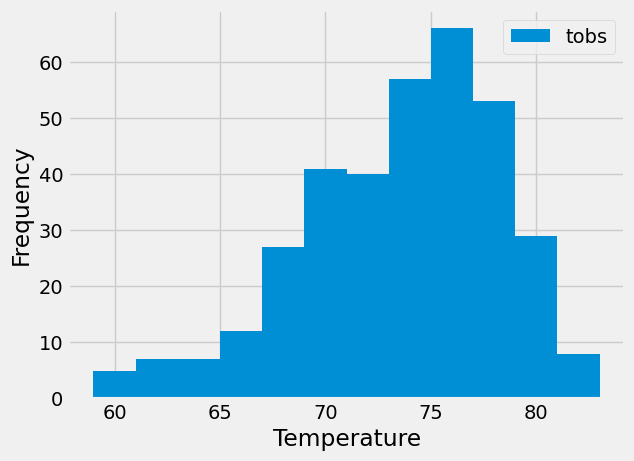

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.date >= year_ago).\
    filter(measurement.station == 'USC00519281').\
    all()

# Save the query results as a Pandas DataFrame.
df2 = pd.DataFrame(temp_data)

# Plot the data
df2.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()